STEP 1: Importing Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

STEP 2: Loading Files into Jupyter Notebook

In [2]:
df_states = gpd.read_file('cb_2016_us_state_20m')
df_states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS      NAME LSAD         ALAND  \
0      23  01779787  0400000US23    23     ME     Maine   00   79885221885   
1      15  01779782  0400000US15    15     HI    Hawaii   00   16634100855   
2      04  01779777  0400000US04    04     AZ   Arizona   00  294198560125   
3      05  00068085  0400000US05    05     AR  Arkansas   00  134771517596   
4      10  01779781  0400000US10    10     DE  Delaware   00    5047194742   

        AWATER                                           geometry  
0  11748755195  MULTIPOLYGON (((-68.92401 43.88541, -68.87478 ...  
1  11777698394  MULTIPOLYGON (((-156.04965 19.78045, -156.0062...  
2   1027346486  POLYGON ((-114.79968 32.59362, -114.80939 32.6...  
3   2960191698  POLYGON ((-94.61792 36.49941, -94.3612 36.4996...  
4   1398720828  POLYGON ((-75.77379 39.7222, -75.75323 39.7579...

In [3]:
df_pp = pd.read_csv('powerplants.csv')

In [4]:
geometry = gpd.points_from_xy(df_pp.Longitude, df_pp.Latitude)
df_pp = gpd.GeoDataFrame(df_pp, geometry=geometry)

STEP 3: Correct the Projection

In [5]:
df_states = df_states.to_crs('epsg:4269')
df_states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [6]:
df_pp.set_crs('epsg:4269', inplace=True, allow_override=True)
df_pp.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

STEP 4: Simple Dot Map

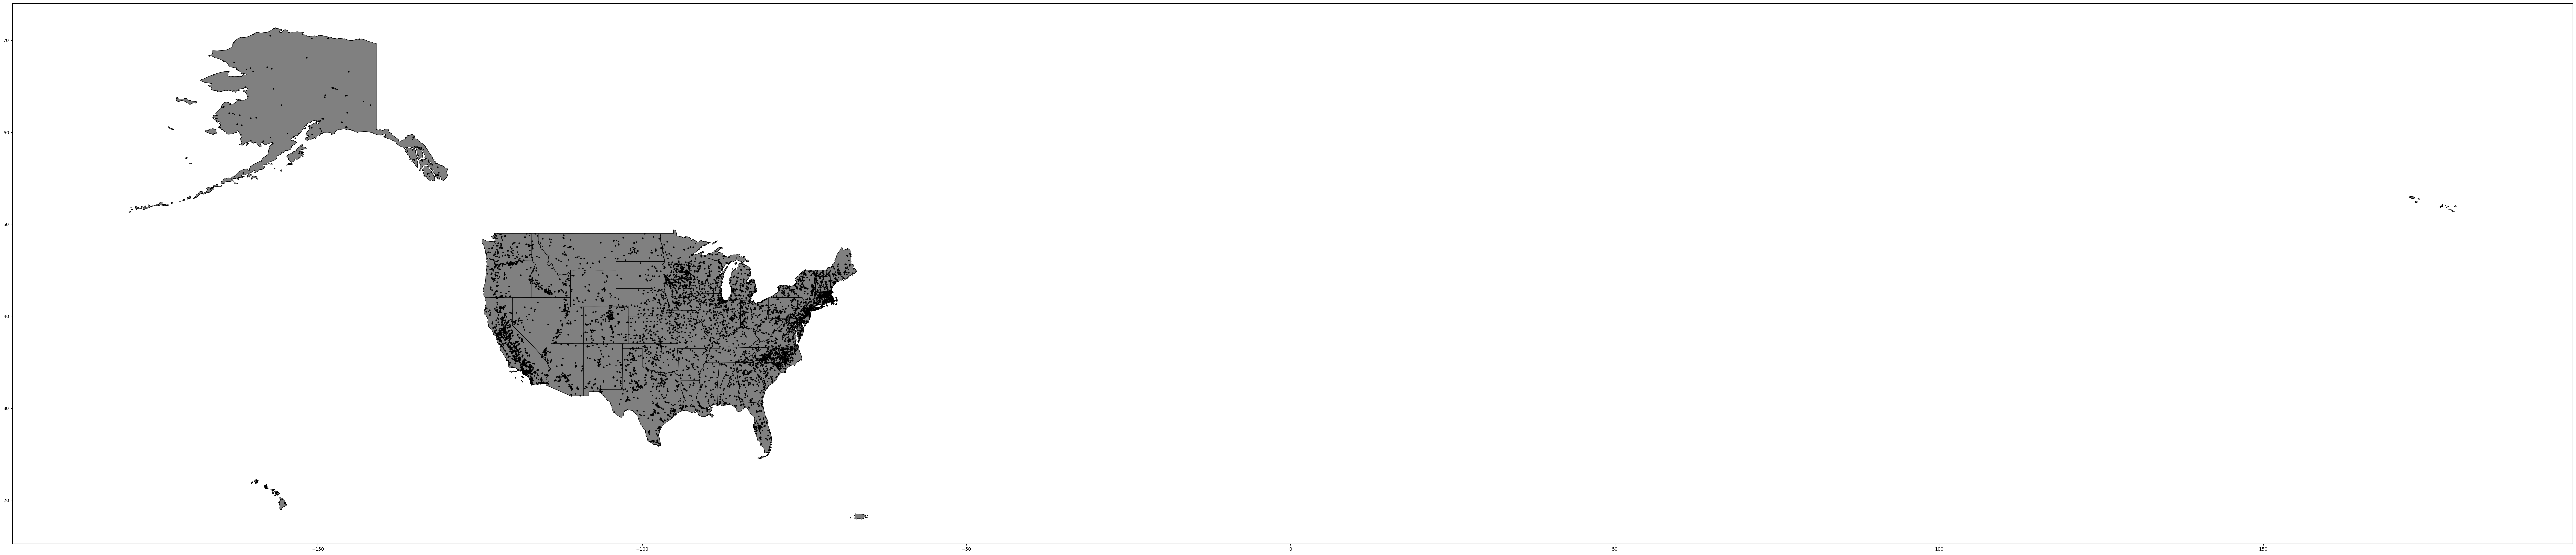

In [7]:
fig, ax = plt.subplots(figsize=(100,100))
df_states.plot(ax=ax, color='grey', edgecolor='black')
df_pp.plot(ax=ax, marker='o', color='black', markersize=5)
plt.show()

STEP 5: Bubble Map

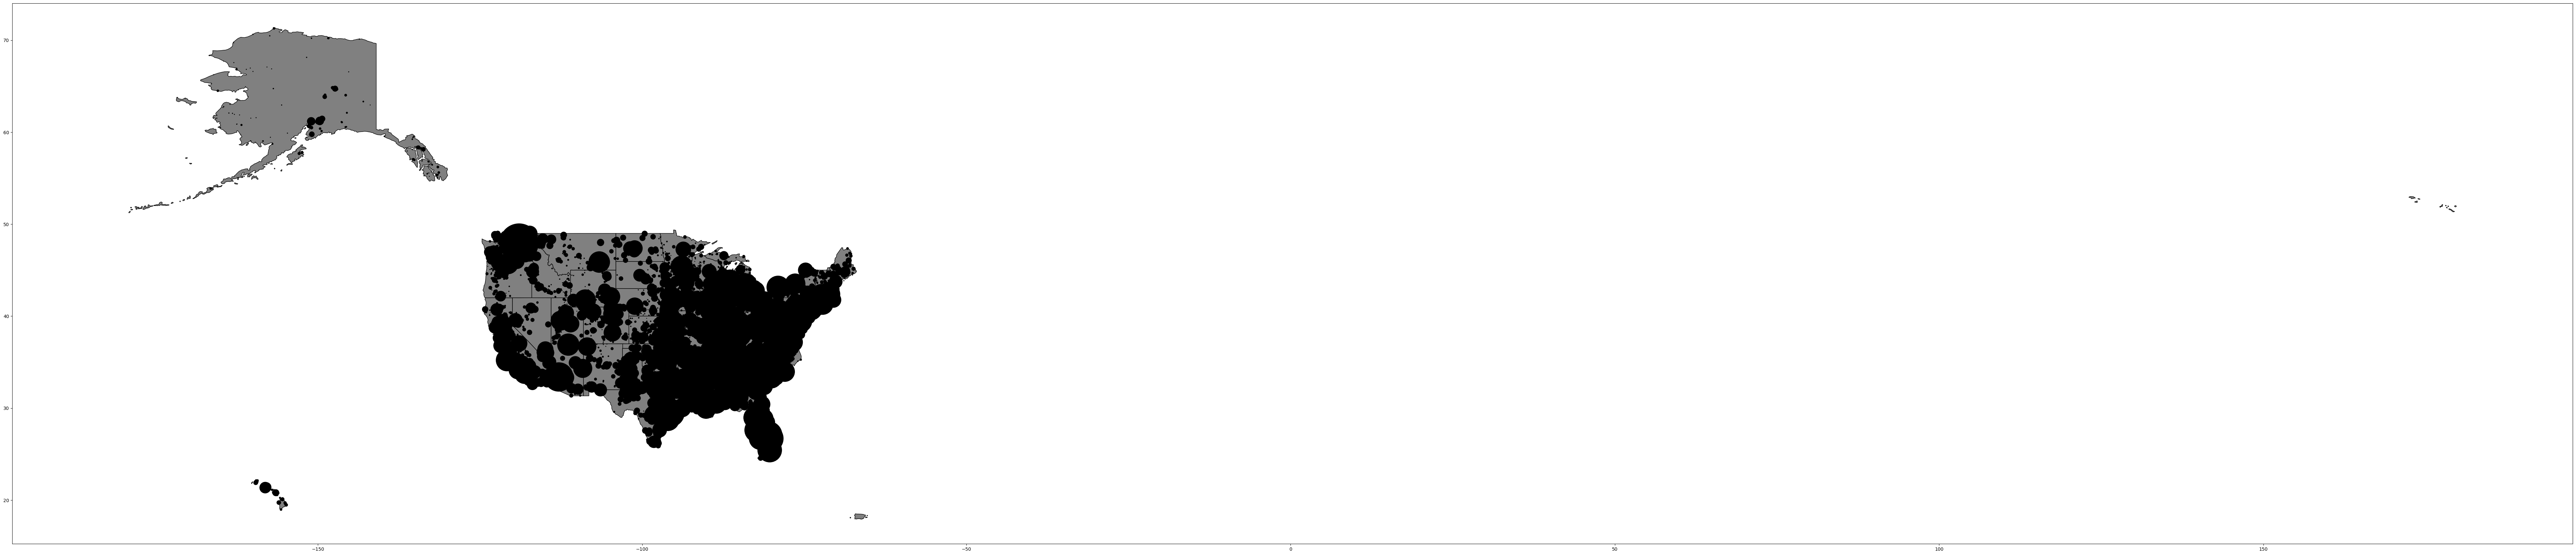

In [8]:
fig, ax = plt.subplots(figsize=(100,100))
df_states.plot(ax=ax, color='grey', edgecolor='black')
df_pp.plot(ax=ax, marker='o', color='black', markersize=df_pp['Total_MW'])
plt.show()

Step 6: Colored Dot Map

In [9]:
df_pp['PrimSource'].value_counts()

PrimSource
solar             2255
natural gas       1701
hydroelectric     1410
wind              1043
petroleum          842
biomass            726
coal               337
other              140
geothermal          66
nuclear             61
pumped storage      35
Name: count, dtype: int64

In [10]:
def color(source):
    if source == 'solar':
        return 'yellow'
    elif source == 'natural gas':
        return 'brown'
    elif source == 'hydroelectric':
        return 'blue'
    elif source == 'wind':
        return 'white'
    elif source == 'petroleum':
        return 'orange'
    elif source == 'biomass':
        return 'green'
    elif source == 'coal':
        return 'black'
    elif source == 'nuclear':
        return 'red'
    elif source == 'pumped storage':
        return 'pink'
    elif source == 'other':
        return 'grey'
    else:
        return 'grey'
df_pp['color'] = df_pp['PrimSource'].apply(color)

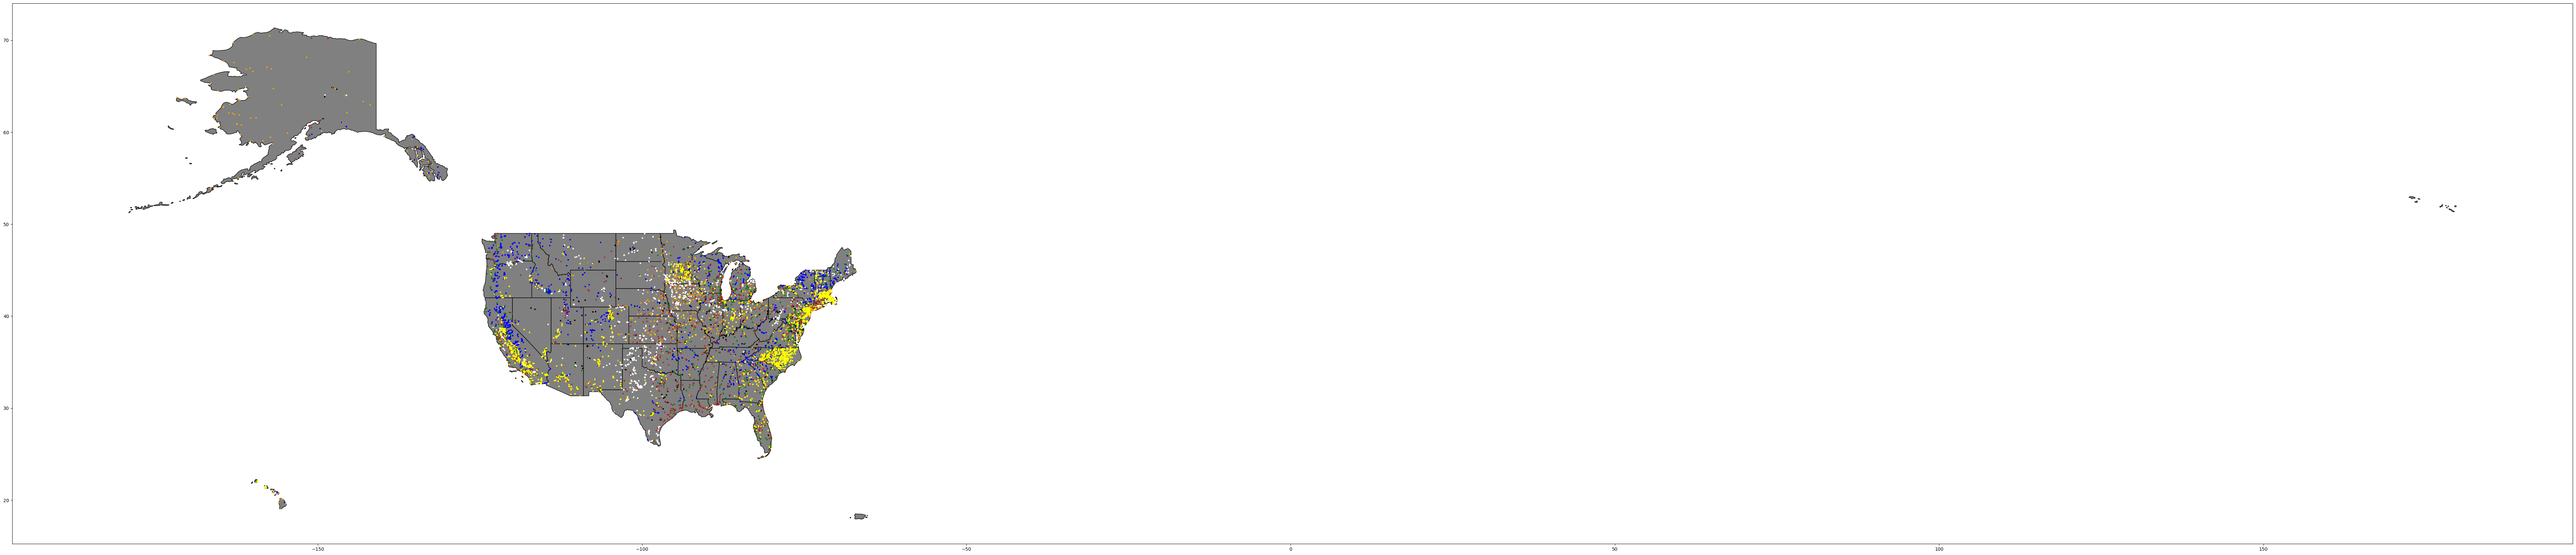

In [11]:
fig, ax = plt.subplots(figsize=(100,100))
df_states.plot(ax=ax, color='grey', edgecolor='black')
df_pp.plot(ax=ax, marker='o', color=df_pp['color'], markersize=5)
plt.show()

Step 7: Colored bubble map

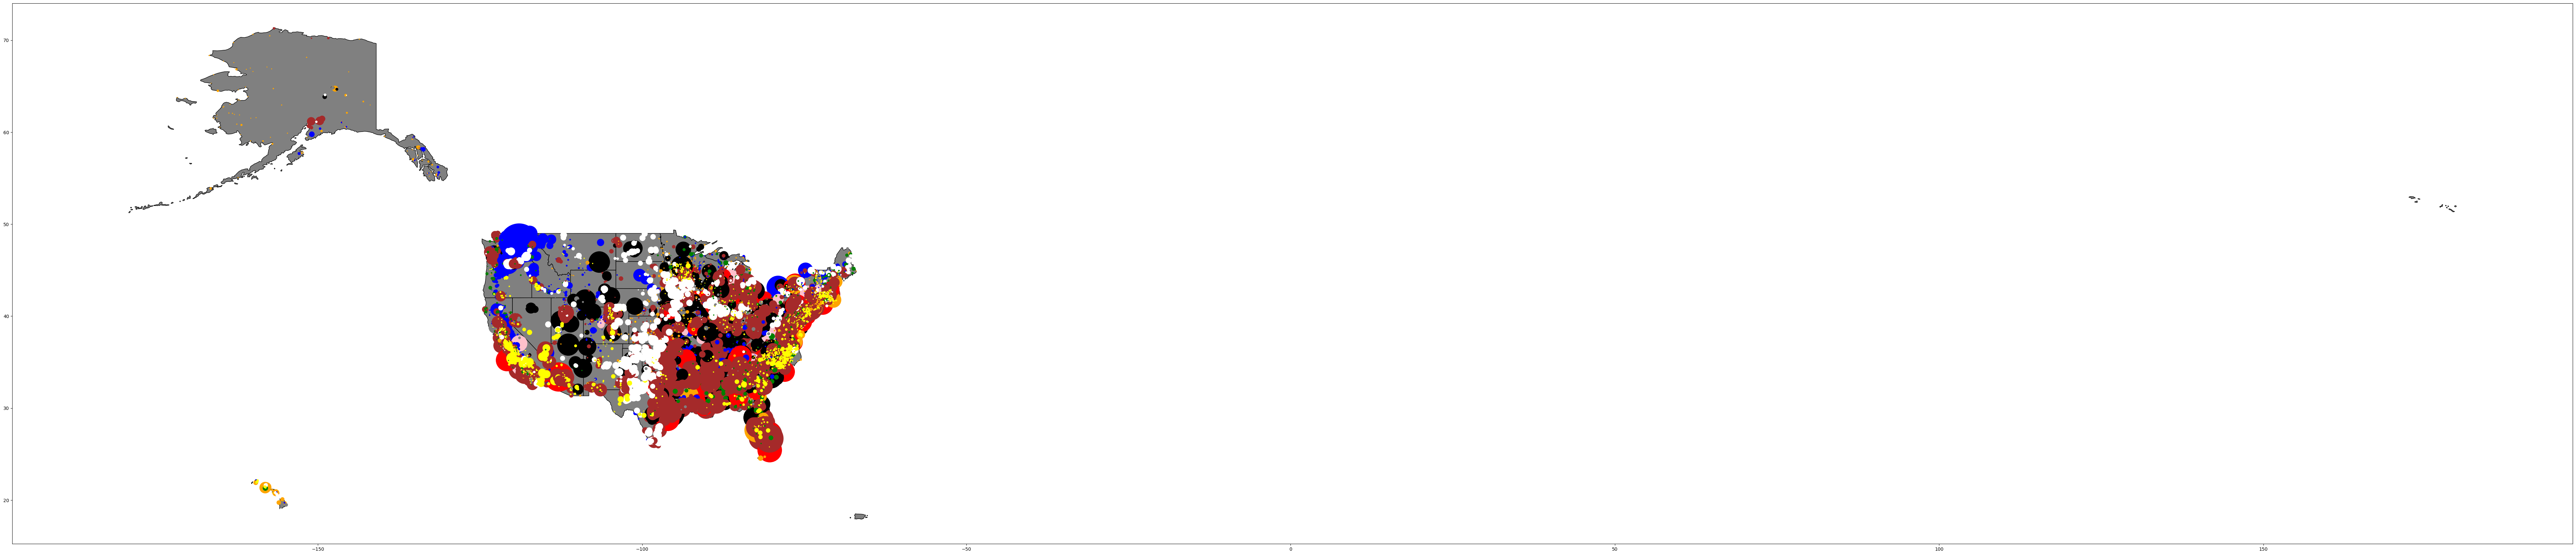

In [12]:
fig, ax = plt.subplots(figsize=(100,100))
df_states.plot(ax=ax, color='grey', edgecolor='black')
df_pp.plot(ax=ax, marker='o', color=df_pp['color'], markersize=df_pp['Total_MW'])
plt.show()

Step 8: Coal only

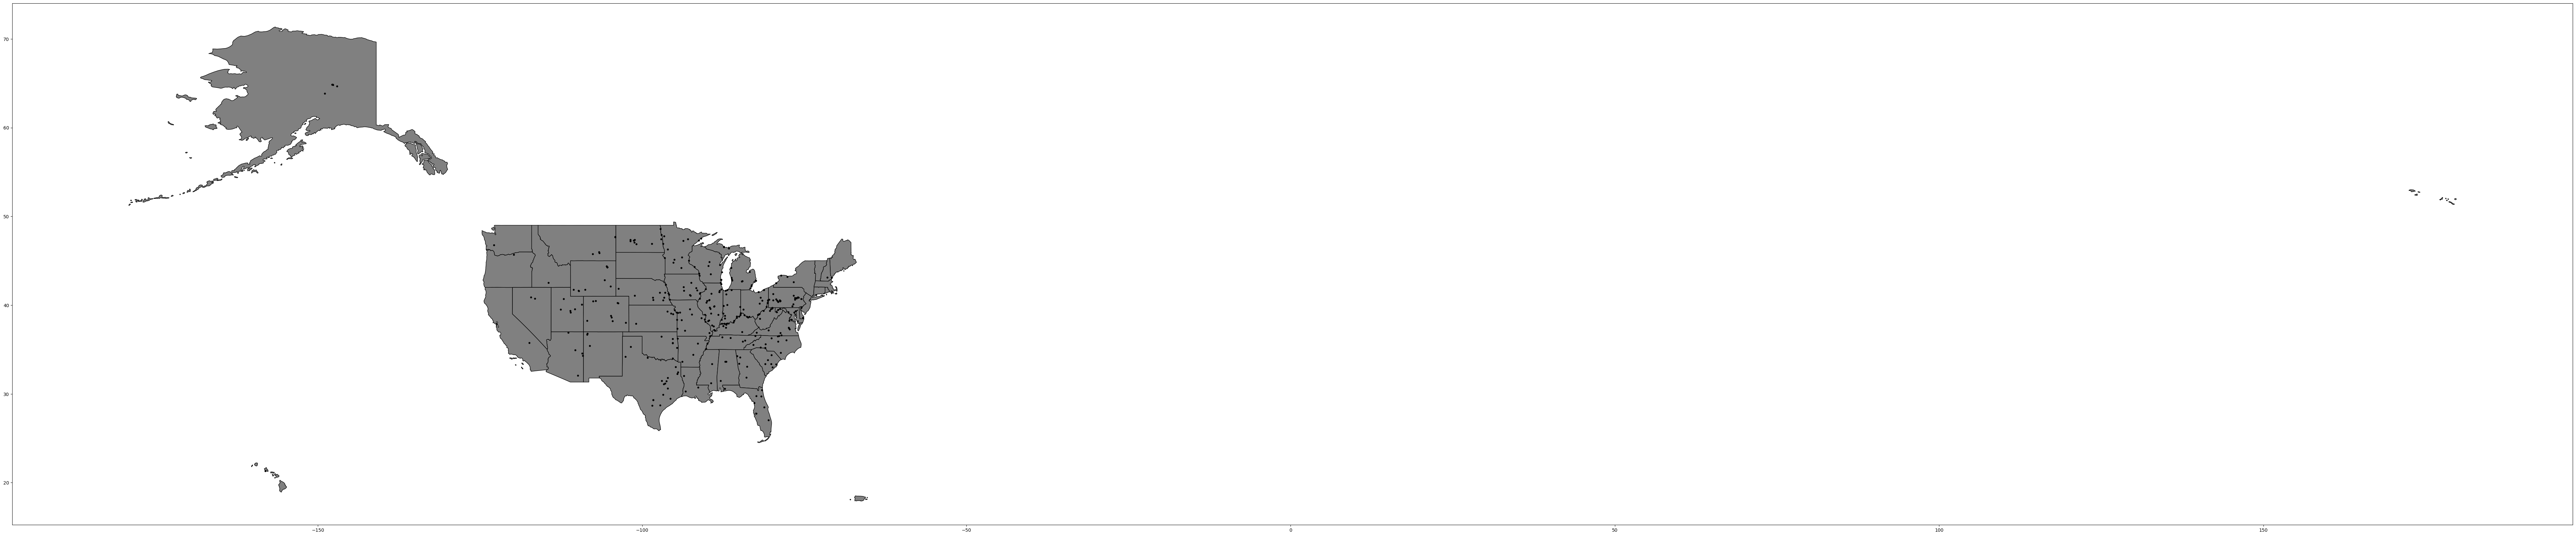

In [13]:
fig, ax = plt.subplots(figsize=(100,100))
df_states.plot(ax=ax, color='grey', edgecolor='black')
df_pp[df_pp['PrimSource']=='coal'].plot(ax=ax, marker='o', color='black', markersize=10)
plt.show()

Step 8: Solar only

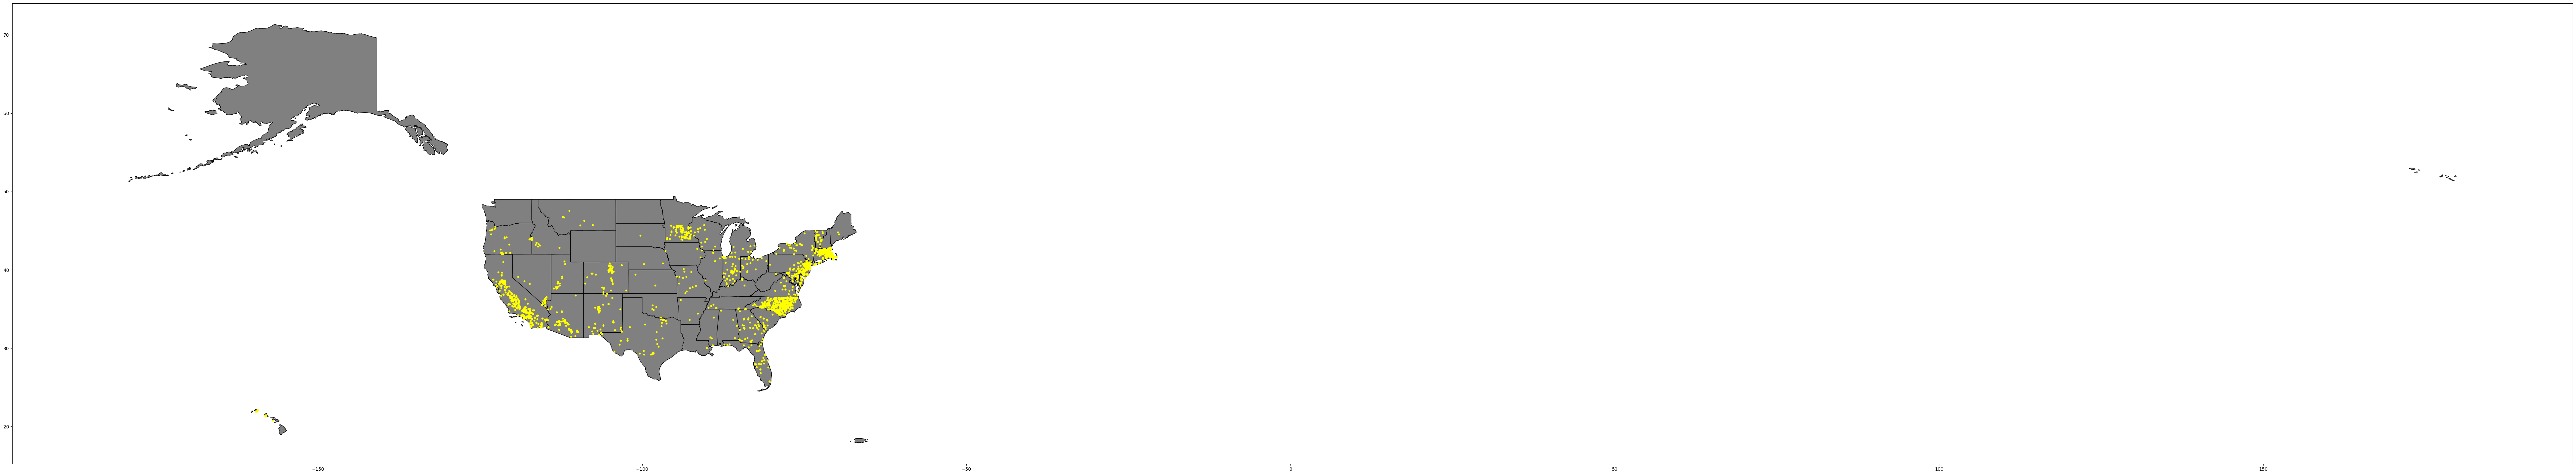

In [14]:
fig, ax = plt.subplots(figsize=(100,100))
df_states.plot(ax=ax, color='grey', edgecolor='black')
df_pp[df_pp['PrimSource']=='solar'].plot(ax=ax, marker='o', color='yellow', markersize=10)
plt.show()

Step 9: Solar choropleth

<Axes: >

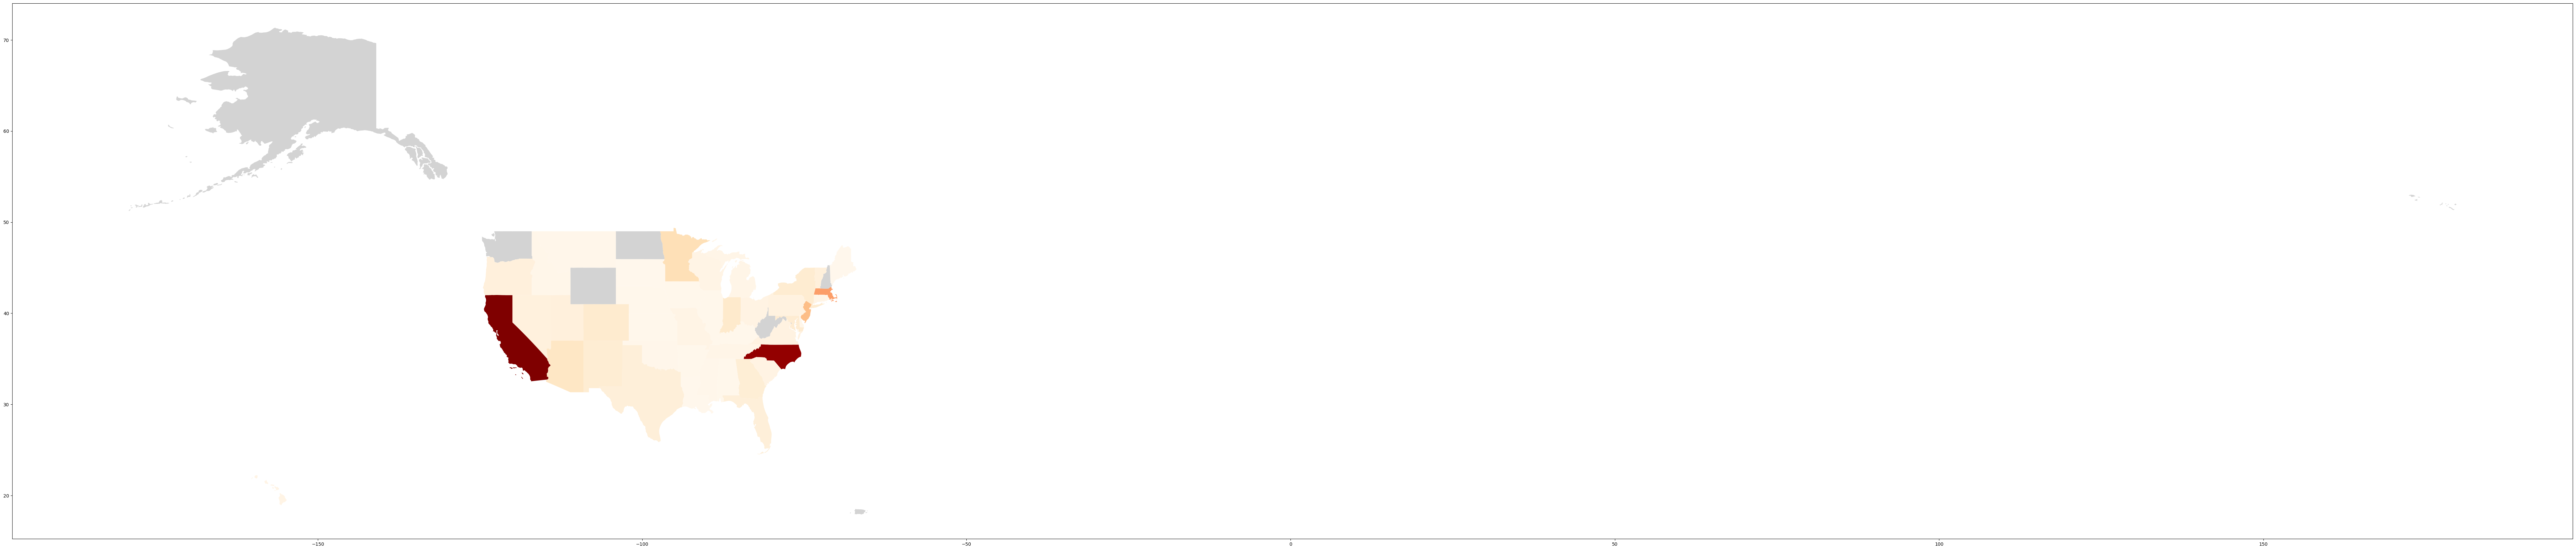

In [15]:
df_solar = df_pp.groupby('StateName')['PrimSource'].value_counts().reset_index(name='Count')
df_solar = df_solar[df_solar['PrimSource']=='solar']
df_merged = df_states.merge(df_solar, left_on='NAME', right_on='StateName',how='left')
df_merged.plot(column='Count', cmap='OrRd', missing_kwds={'color': 'lightgrey'},figsize=(100,100))

Step 10: Coal Choropleth

<Axes: >

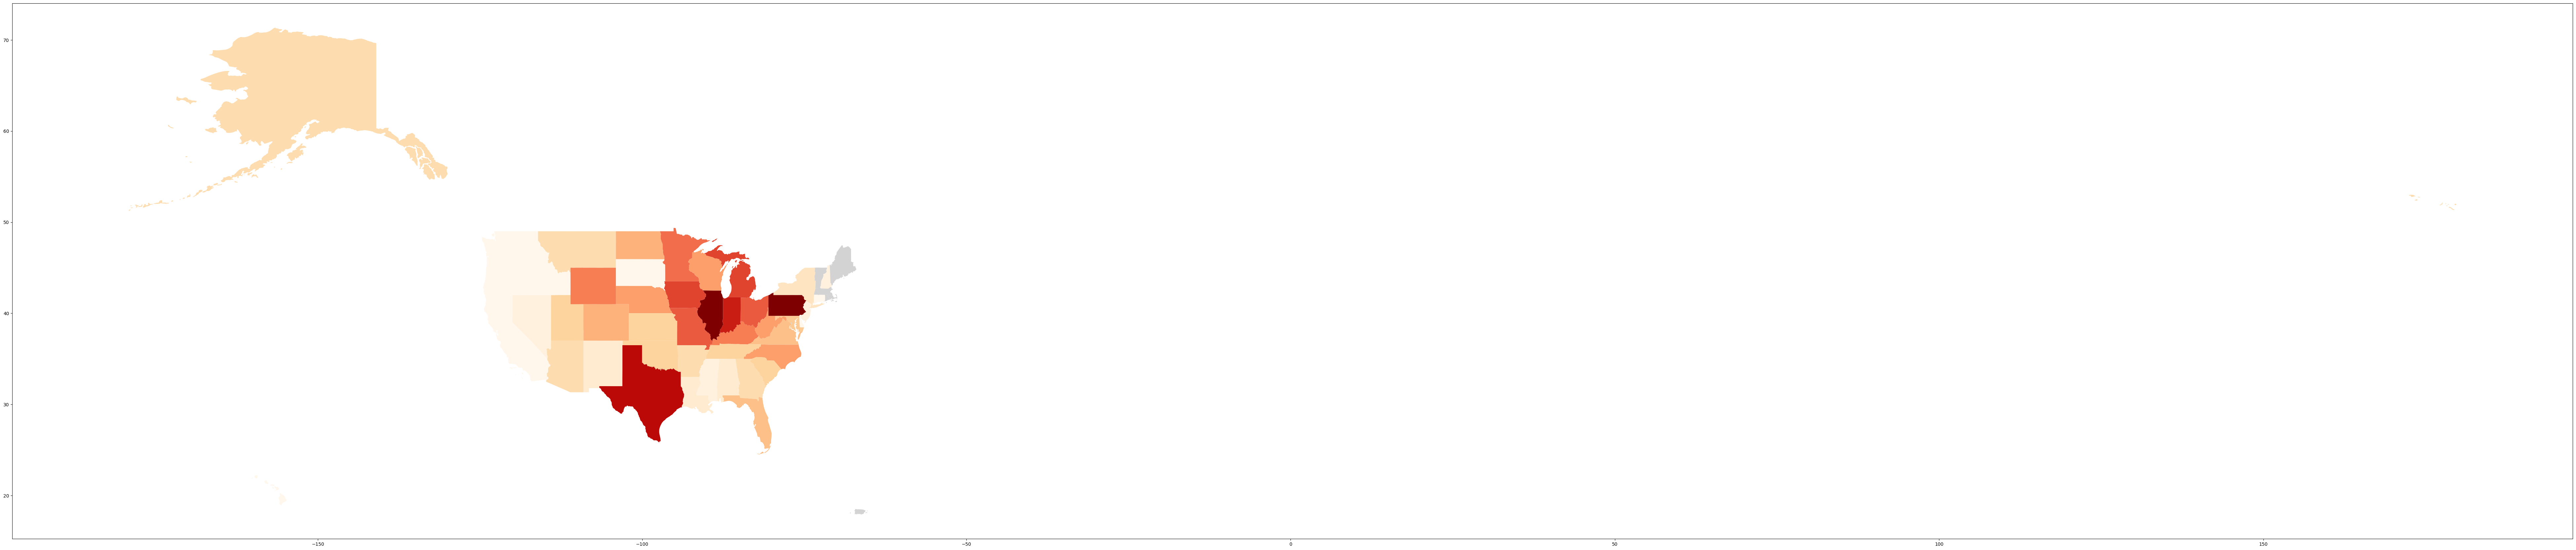

In [16]:
df_coal = df_pp.groupby('StateName')['PrimSource'].value_counts().reset_index(name='Count')
df_coal = df_coal[df_coal['PrimSource']=='coal']
df_merged = df_states.merge(df_coal, left_on='NAME', right_on='StateName',how='left')
df_merged.plot(column='Count', cmap='OrRd', missing_kwds={'color': 'lightgrey'},figsize=(100,100))

STEP 11: Power Output by State 

In [17]:
df_output = df_pp.groupby('StateName')['Total_MW'].sum().reset_index(name='Sum')
df_merged = df_states.merge(df_output, left_on='NAME', right_on='StateName',how='left')

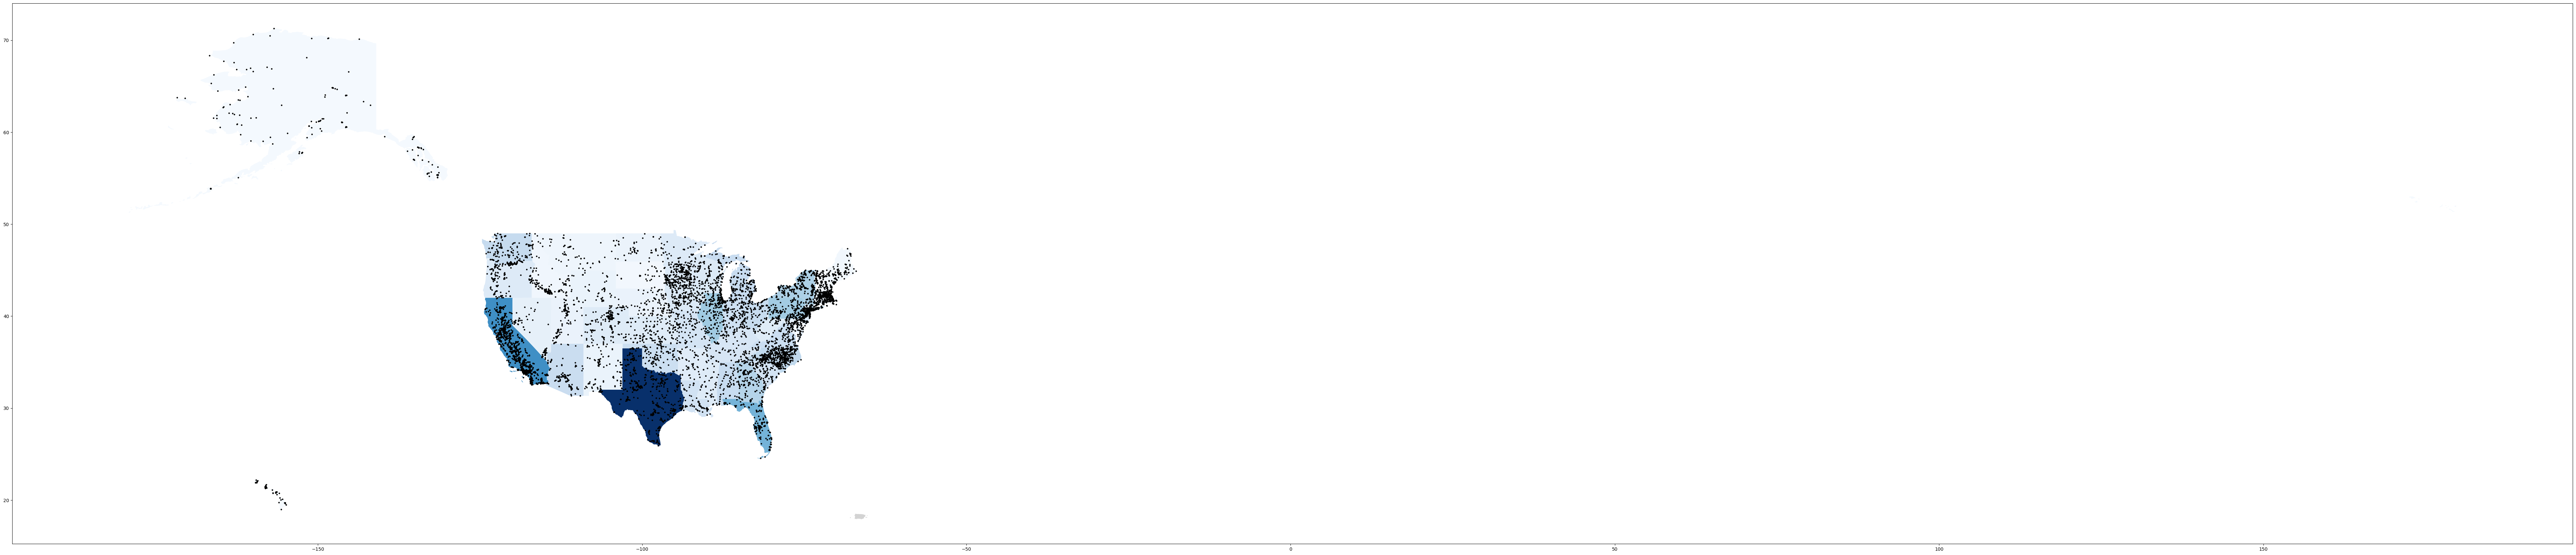

In [18]:
fig, ax = plt.subplots(figsize=(100, 100))
df_merged.plot(ax=ax, column='Sum', cmap='Blues', missing_kwds={'color': 'lightgrey'})
df_pp.plot(ax=ax, marker='o', color='black', markersize=5)
plt.show()